<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Deep_Learning_%7C_Customer_churn_prediction_using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/11_chrun_prediction'

churn.ipynb  customer_churn.csv


In [4]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/11_chrun_prediction/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# to drop the column and update the same dataframe use inplace = True
df.drop('customerID', axis='columns', inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values # values are stored as string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
# convert to number
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges, errors='coerce')

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

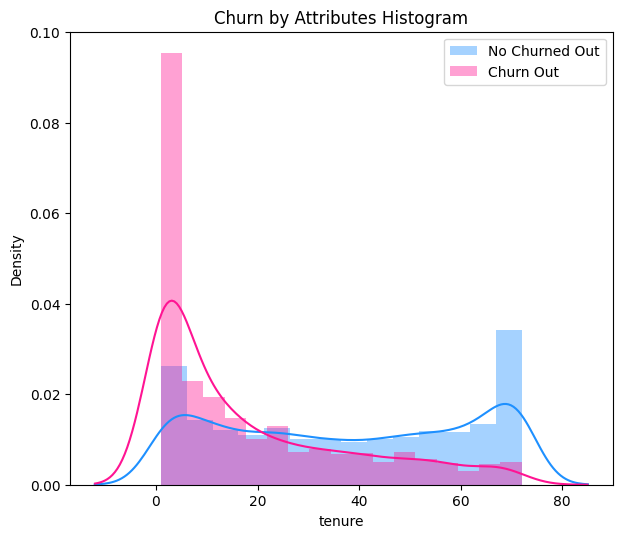

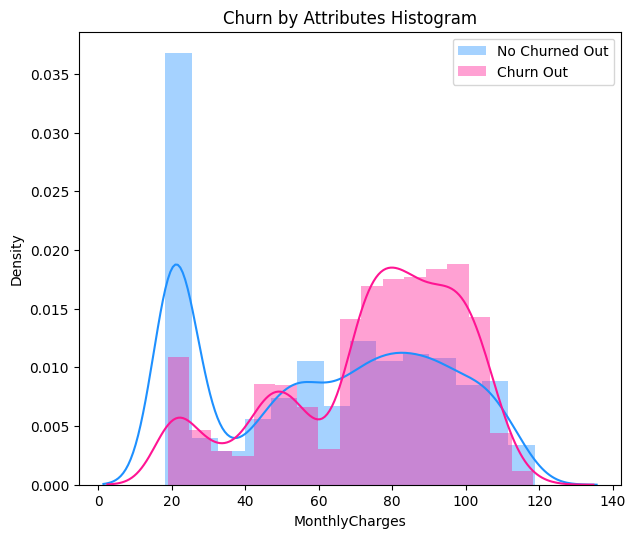

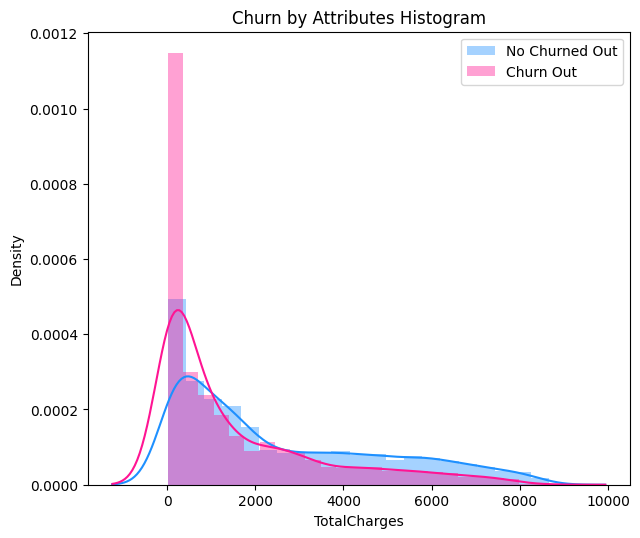

In [16]:
# doing Exploratory data Analysis
col_names = ['tenure','MonthlyCharges','TotalCharges',]

for i in col_names:

    plt.subplots(figsize=(7,6), dpi=100)
    sns.distplot( df1.loc[df1['Churn']=='No', i] , color="dodgerblue", label="No Churned Out")
    sns.distplot( df1.loc[df1['Churn']=='Yes', i] , color="deeppink", label="Churn Out")
    plt.title('Churn by Attributes Histogram')
    plt.legend();




In [17]:
  # find out unique values in each column
def print_datatypes(df1):
    for column in df1:
      if df1[column].dtypes=='object':
        print(f'{column} : {df1[column].unique()}')

In [18]:
print_datatypes(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
df1.replace('Bank transfer (automatic)', 'Bank transfer', inplace=True)
df1.replace('Credit card (automatic)', 'CC', inplace=True)


In [20]:
print_datatypes(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']
Churn : ['No' 'Yes']


In [21]:
# convert Yes n No column to 1 & 0
binary_columns  = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in binary_columns:
  df1[i].replace({'Yes':1,'No':0}, inplace=True)

df1['gender'].replace({'Male':1,'Female':0}, inplace=True)
  

In [22]:
print_datatypes(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']


In [23]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [24]:
# Now doing one hot encoding for columns that has more than 2 unique values
df2= pd.get_dummies(data = df1, columns =['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer', 'PaymentMethod_CC',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.drop('InternetService_No', axis ='columns', inplace=True)
df2.drop('Contract_Two year', axis ='columns', inplace=True)
df2.drop('PaymentMethod_Mailed check', axis ='columns', inplace=True)



In [26]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer,PaymentMethod_CC,PaymentMethod_Electronic check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,1
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,1,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,1,0,0,0,1


In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year',
       'PaymentMethod_Bank transfer', 'PaymentMethod_CC',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [28]:
df2.shape

(7032, 24)

In [29]:
# scaling to be done on the columns like tenure, monthly charges and total charges
cols_to_scale =['TotalCharges','MonthlyCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.head() # now data frame is ready to be used

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer,PaymentMethod_CC,PaymentMethod_Electronic check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,1,0,0,0,1
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,1,0,0,0
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,1,0,0,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,1,1,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,1,0,0,0,1


In [31]:
x= df2.drop('Churn', axis='columns')
y= df2.Churn

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
len(xtrain),len(xtest)

(5625, 1407)

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [34]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5637 - accuracy: 0.7111
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7790
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7948
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8041
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8043
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8023
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accura

In [35]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7903


[0.4456324577331543, 0.7903340458869934]

In [36]:
yp = model.predict(xtest)

In [37]:
ypred =[]
for i in yp:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Actual')

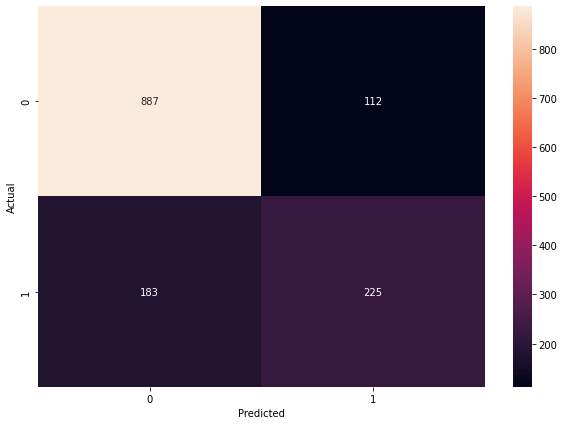

In [39]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=ytest, predictions= ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

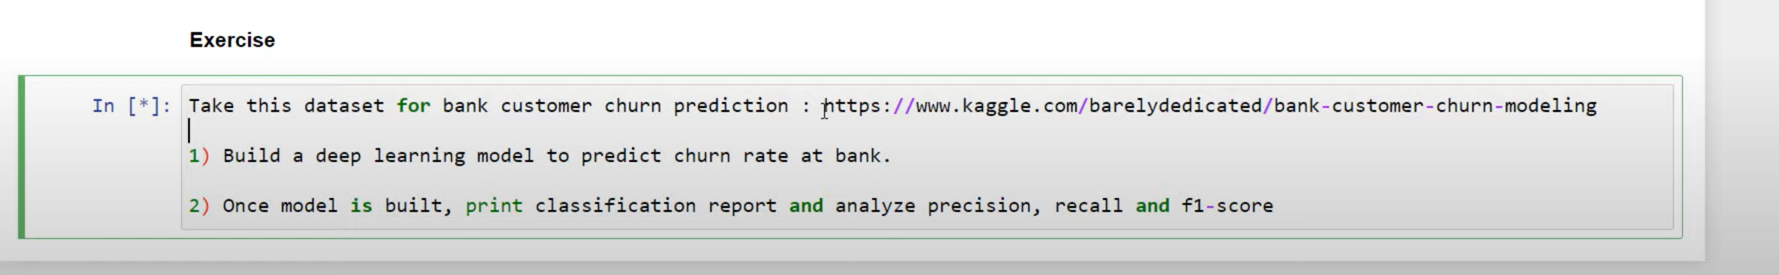

# *Precision , Recall & Accuracy*

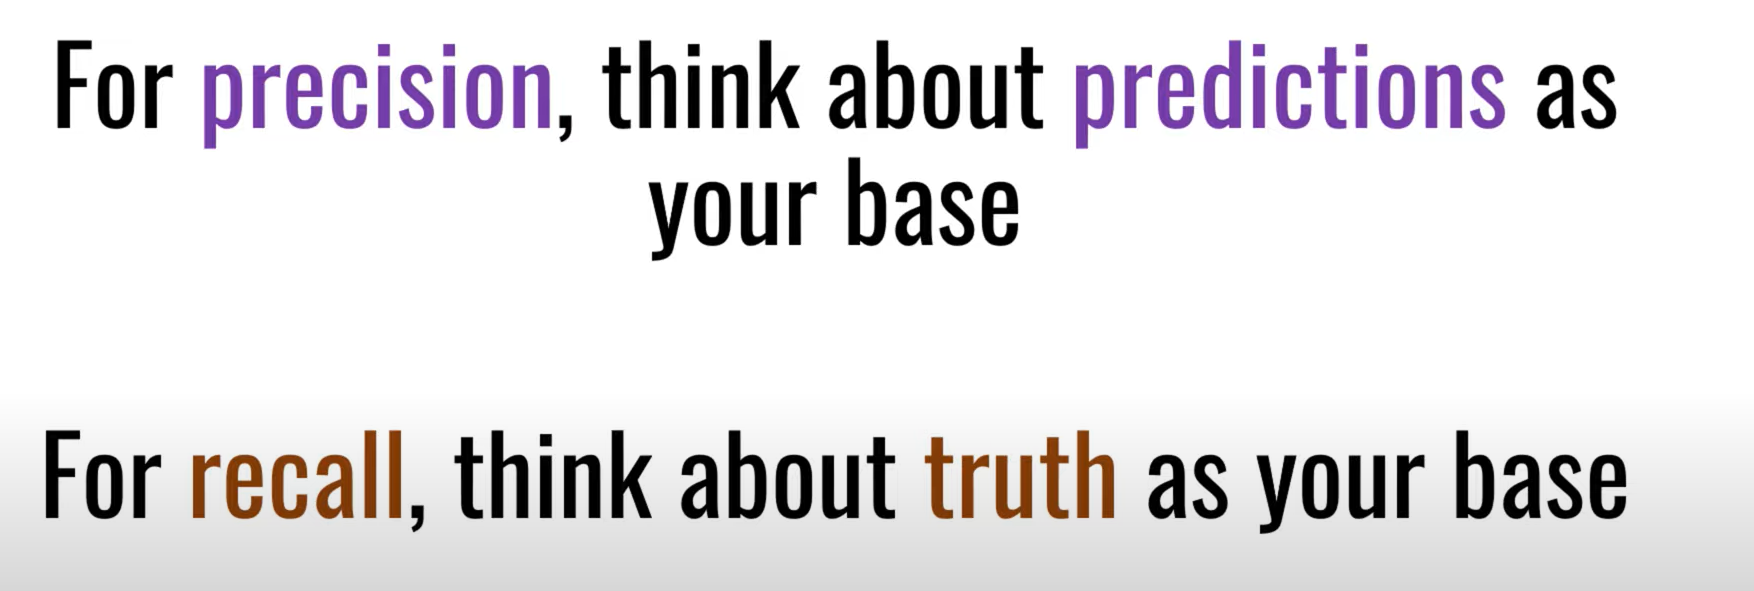